In [64]:
#Basics
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Stats and Modeling
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

#Module
from wrangle import wrangle_zillow

## Scaling

#### Get Data

In [2]:
#get data and use split of 70/15/15
tr, te, val = wrangle_zillow(val_ratio=.15,test_ratio=.15)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495897 entries, 1945062 to 964515
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   value       1495897 non-null  float64
 1   county      1495897 non-null  object 
 2   bed         1495897 non-null  int64  
 3   bath        1495897 non-null  float64
 4   sf          1495897 non-null  float64
 5   yearbuilt   1495897 non-null  int64  
 6   Orange_CA   1495897 non-null  uint8  
 7   Ventura_CA  1495897 non-null  uint8  
dtypes: float64(3), int64(2), object(1), uint8(2)
memory usage: 82.7+ MB


#### Split data into modeling dataframes

In [14]:
#drop target and category columns for eda
X_tr = tr.iloc[:,2:-2]
#pull out target
y_tr = tr.iloc[:,0]

#repeat for test and validate
X_te = te.iloc[:,2:-2]
y_te = te.iloc[:,0]
X_val = val.iloc[:,2:-2]
y_val = val.iloc[:,0]

In [76]:
test = tr[['bed','bath','sf','yearbuilt']]

In [81]:
kind = "MinMax"

In [84]:
kind.upper()

'MINMAX'

In [15]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495897 entries, 1945062 to 964515
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bed        1495897 non-null  int64  
 1   bath       1495897 non-null  float64
 2   sf         1495897 non-null  float64
 3   yearbuilt  1495897 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 57.1 MB


### Scaling
- Min/Max
- Standardization
- Robust

#### min/max scaling
Create X_train datasets for these

In [44]:
#MIN MAX SCALER
scaler = MinMaxScaler()
#Fit and transform train
X_tr_mm_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

#STANDARDIZATION SCALER
scaler = StandardScaler()
#Fit and transform train
X_tr_st_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#ROBUST SCALER
scaler = RobustScaler()
#Fit and transform train
X_tr_r_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#### Visualize the original X train vs the scaled versions

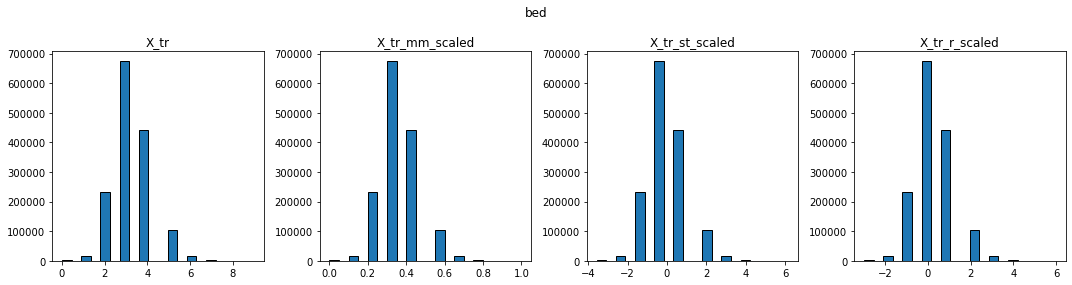

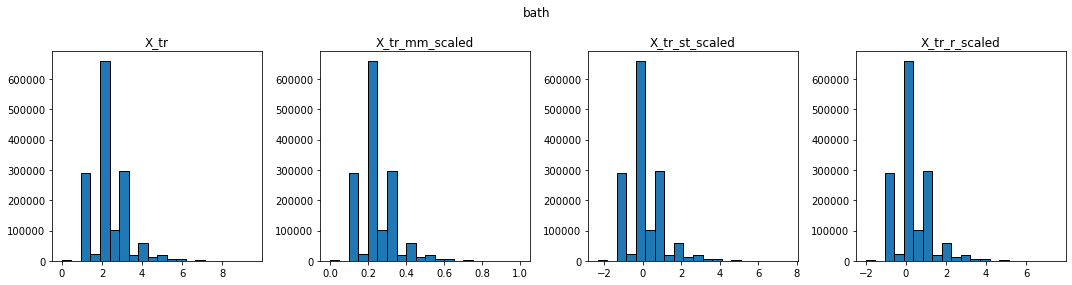

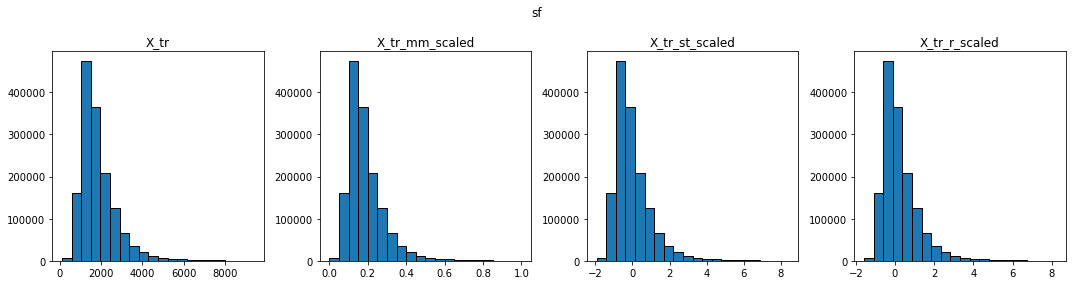

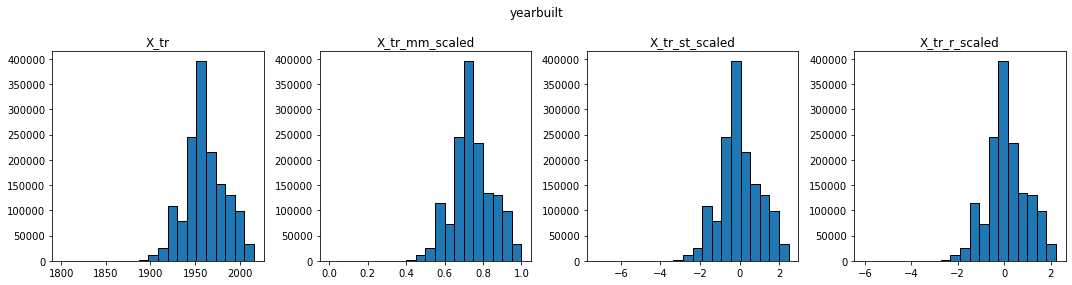

In [38]:
#values to loop over
lst = [X_tr, X_tr_mm_scaled, X_tr_st_scaled, X_tr_r_scaled]
lst_str = ['X_tr', 'X_tr_mm_scaled', 'X_tr_st_scaled', 'X_tr_r_scaled']

for c in X_tr.columns:
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(c)
    ct=0
    for x in lst:
        ct +=1
        plt.subplot(1,4,ct)
        plt.hist(x[c],bins=20,ec='black')
        plt.title(lst_str[ct-1])
        
    plt.tight_layout()

#### Now use inverse_transform to check you get the same X_tr

In [54]:
(X_tr == scaler.inverse_transform(X_tr_r_scaled)).sort_values(by='sf')
#Oddly some falses

,bed,bath,sf,yearbuilt
1306630,True,True,False,True
393032,True,True,False,True
1499505,True,True,False,True
1210021,True,True,False,True
1852118,True,True,False,True
...,...,...,...,...
287832,True,True,True,True
535650,True,True,True,True
1124437,True,True,True,True
602622,True,True,True,True


In [63]:
#But if we look at the actual sf values for one of those rows, we can see that they are the same (both 1989)
X_tr.iloc[393032,:]

bed             3.0
bath            2.0
sf           1989.0
yearbuilt    1966.0
Name: 814269, dtype: float64

In [62]:
scaler.inverse_transform(X_tr_r_scaled)[393032,:]

array([   3.,    2., 1989., 1966.])

#### Now use Quantile Transformer

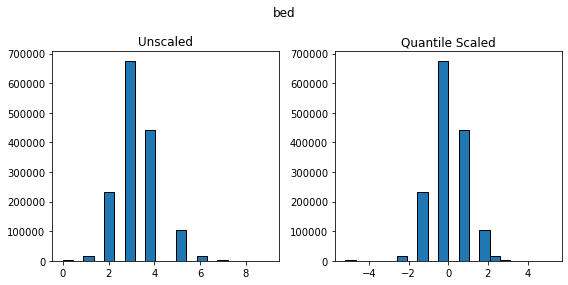

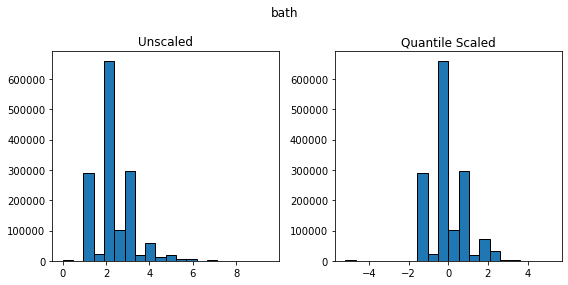

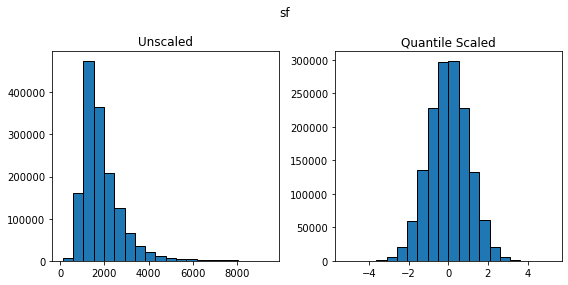

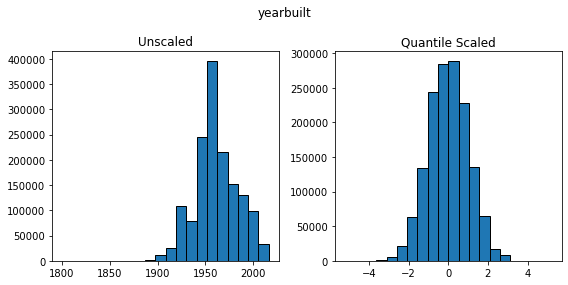

In [71]:
#QUANTILE SCALER - using normal output_distribution
scaler = QuantileTransformer(output_distribution='normal')
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

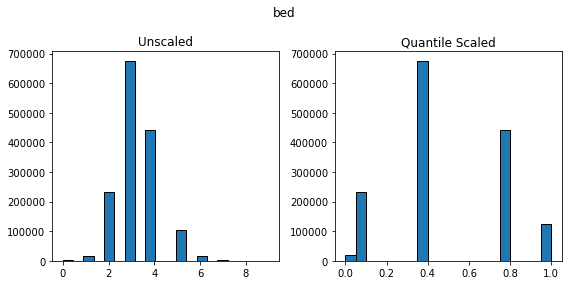

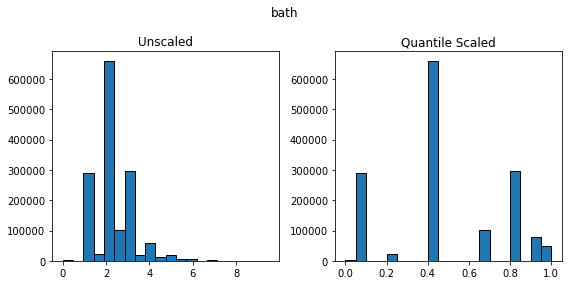

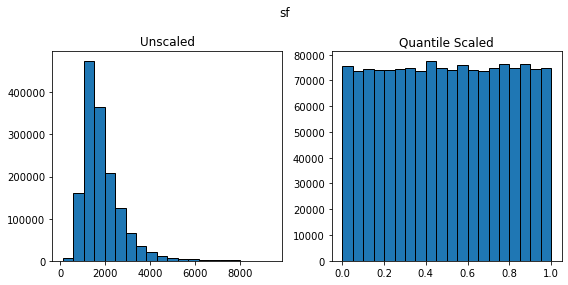

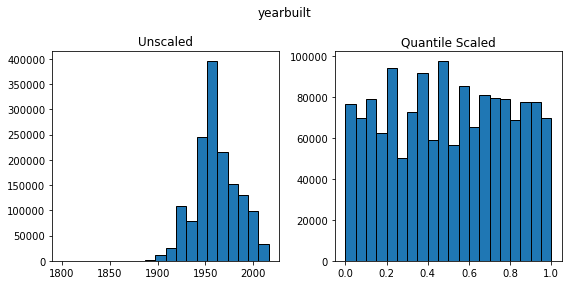

In [72]:
#QUANTILE SCALER - using output_distribution default of 'uniform'
scaler = QuantileTransformer()
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

# TO DO:

## Test the new scale_zillow function!
## Double check all exercises are complete